# Regression Problem

Regression analysis is a set of statistical processes for estimating the relationships among variables. Formally,

* The unknown parameters, denoted as $\theta$ , which may represent a scalar or a vector.
* The independent variables, $\mathcal{X}$.
* The dependent variable, $\mathcal{Y}$.

The goal is then to be able to predict $\mathcal{Y}$ given < $\mathcal{X}$, $\theta$ > :

$$\mathcal{Y} \approx h(X, \theta)$$

where $h(X, \theta)$ is called the hypotesis function.

In [ ]:
from IPython.display import IFrame
IFrame('https://drive.google.com/file/d/1cJHJ5AdcFd0tibQvCrME4ychIrvPQoGc/preview', width=340, height=220)

In [ ]:
from IPython.display import IFrame
IFrame('https://drive.google.com/file/d/1WknHdpGr4HkJU3ZCuW9i0tBJDF6MDd5w/preview', width=340, height=220)

## Linear Regression

Let's say that we decide to represent the hypothesis $h$ as a linear function of $\mathcal{X}$:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

Here, the $\theta_i$’s are the parameters (also called weights) parameterizing the space of linear functions mapping from $\mathcal{X}$ to $\mathcal{Y}$. When there is no risk of confusion, we will drop the $\theta$ subscript in $h_\theta(x)$, and write it more simply as $h(x)$. To simplify our notation, we also introduce the convention of letting $x_0 = 1$ (the intercept term), so that

$$h(x) = \sum_{i=0}^{n} \theta_i x_i = \theta^T x$$

In order to learn parameters $\theta$ the most naive choice is to make $h(x)$ as close as possible from $\mathcal{Y}$, which brings us to the cost function:

$$J(\theta) = \frac{1}{2} \sum_{i=0}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Which measures the half total of the total square distance from model to reality.IFrame('https://drive.google.com/file/d/1WknHdpGr4HkJU3ZCuW9i0tBJDF6MDd5w/preview', width=340, height=220)

### Least Mean Aquares algorithm

We want to choose $\theta$ so as to minimize the cost function $J(\theta)$. To do so, lets consider applying [gradient descent algorithm](/notebooks/math/gradient-descent.ipynb):

$$\theta_{j} := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

(every single interation, we simultaneously update all values of $\theta$)

Here, $\alpha$ is usually called the **learning rate**.

Working out this partial derivative we get:


$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} \frac{1}{2} (h_\theta(x) - y)^2
\\= \frac{1}{2} \cdot 2 (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} (h_\theta(x) - y)
\\= (h_\theta(x) - y) \cdot \frac{\partial}{\partial \theta_j} \sum_{i=0}^{n} (\theta_i x_i - y)
\\= (h_\theta(x) - y) x_j$$

therefore we end up with:

$$\theta_{j} := \theta_j + \alpha \cdot (y^{(i)}  - h_\theta(x^{(i)})) x_j^{(i)}$$

The rule is called the LMS update rule and is also known as the Widrow-Hoff learning rule. Note that the magnitude of the update is proportional to the error term $(y^{(i)}  - h_\theta(x^{(i)}))$. This method looks at every example in the entire training set on every step, and is called **batch gradient descent**. It is also important that, while gradient descent can be susceptible to local minima in general, the optimization problem we have posed here for linear regression has only one global, and no other local, optima; thus **gradient descent always converges** (assuming the learning rate $\alpha$ is not too large) to the global minimum.

#### Example

Let's say that we want to predict the selling price of a house. We indentified two independent variables that contribute to the selling price (living area and number of bedrooms) and we collected the following data: 

| Living area (square feet) | #bedrooms   | price (1000$s) |
|---------------------------|-------------|----------------|
| 2104                      | 3           | 400            |
| 1600                      | 3           | 330            |
| 2400                      | 3           | 369            |
| 1416                      | 2           | 232            |
| 3000                      | 4           | 540            |


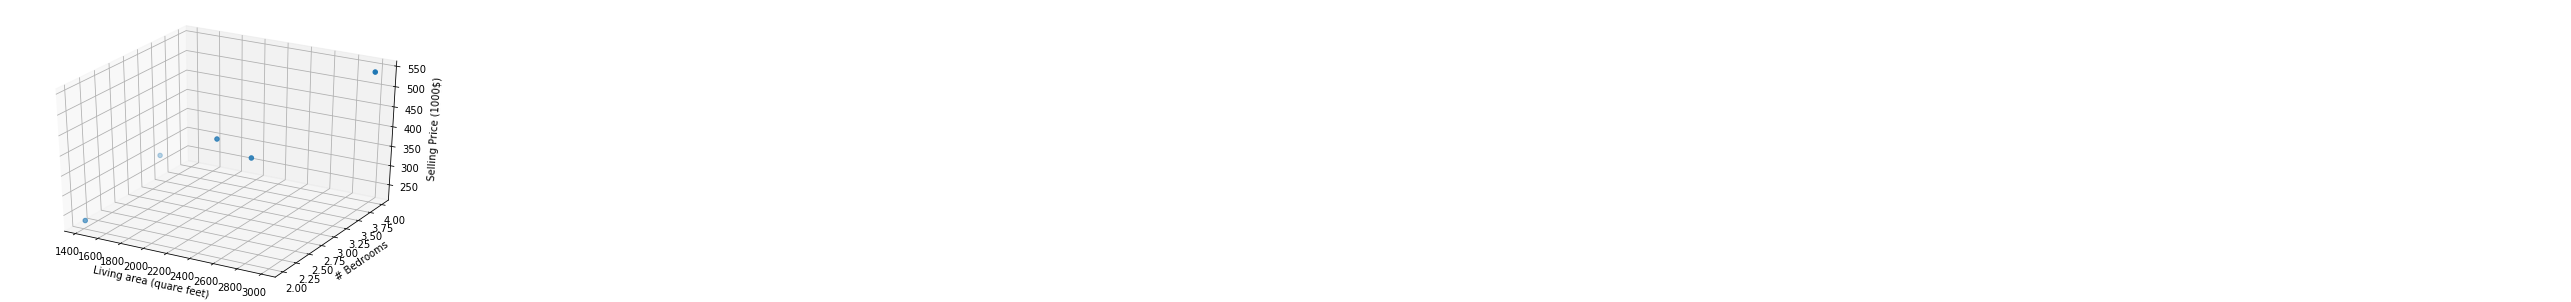

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

t = np.array([[2104, 3, 400],
             [1600, 3, 330],
             [2400, 3, 369],
             [1416, 2, 232],
             [3000, 4, 540]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(t[:,0], t[:,1], t[:,2])
ax.set_xlabel('Living area (quare feet)')
ax.set_ylabel('# Bedrooms')
ax.set_zlabel('Selling Price (1000$)')

plt.show()

Applying now LMS algorith:

In [100]:
theta = np.array([0, 0])
theta_n = np.array([0, 0])
print(t[:,0:2])
print(t[:,2])
print(theta * t[:,0:2])
print(t[:,0:2])

print(t[:,2] - np.sum(theta * t[:,0:2], axis=1))

print(t[1,1])

print("---")
j = 0
i = 1
print((t[i,2] - np.sum(theta * t[i,0:2])))


alpha = 0.01
num_parameters = 2
num_of_samples = 5

# print (error)

for x in range(0, 3):
    for j in range(0, num_parameters):
        for i in range(0, num_of_samples):
            theta_n[j] = theta[j] + alpha * (t[i,2] - np.sum(theta * t[i,0:2])) * t[i,j]
    theta = theta_n
    print(theta_n)

print (theta)

[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]
[400 330 369 232 540]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]
[400 330 369 232 540]
3
---
330
[16200    21]


OverflowError: Python int too large to convert to C long